In [2]:
%load_ext autoreload
%autoreload 2

from net.custome_net import MLP,LeNet,ModelInitializer
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.init as init
from dataset.get_dataloader import get_dataloader,loader2vec, vec_dis
from dataset.data2betti import distance_betti, distance_betti_ripser, plt_betti_number,plot_betti_number_bars
from ripser import Rips, ripser
import numpy as np
from dataset.get_betti_number import betti_4_net
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

import PIL.Image as Image
import os
from torchvision import transforms as transforms

In [3]:
image_size = 32
CIFAR_MEAN = [0.49139968, 0.48215827, 0.44653124]
CIFAR_STD = [0.2023, 0.1994, 0.2010]
data_transform={'train':transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.Resize(image_size),
                    transforms.CenterCrop(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize(CIFAR_MEAN, CIFAR_STD)
                    ])}

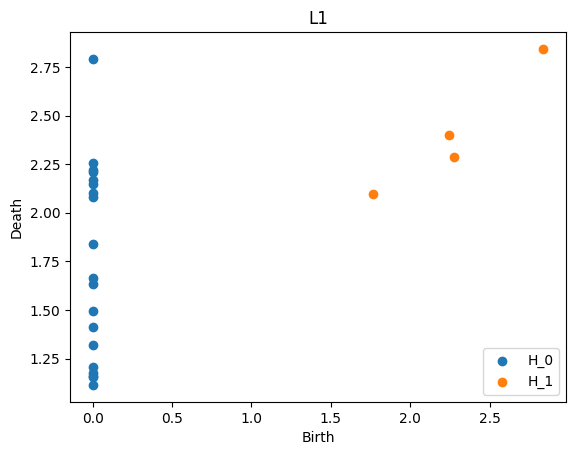

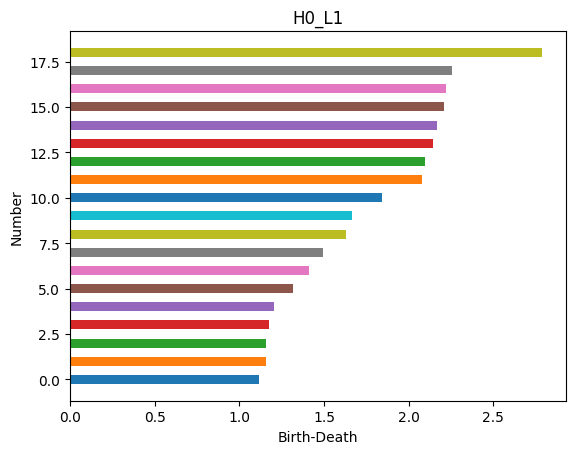

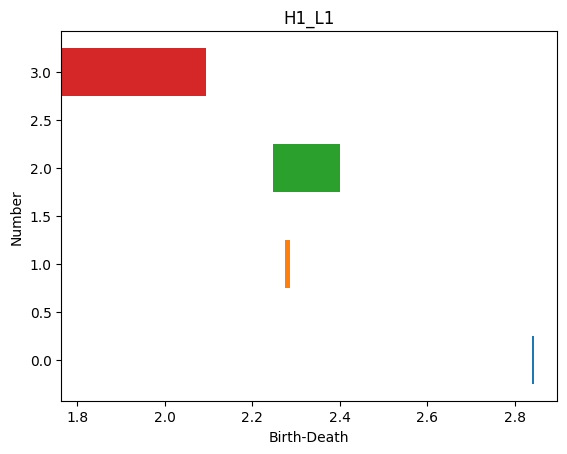

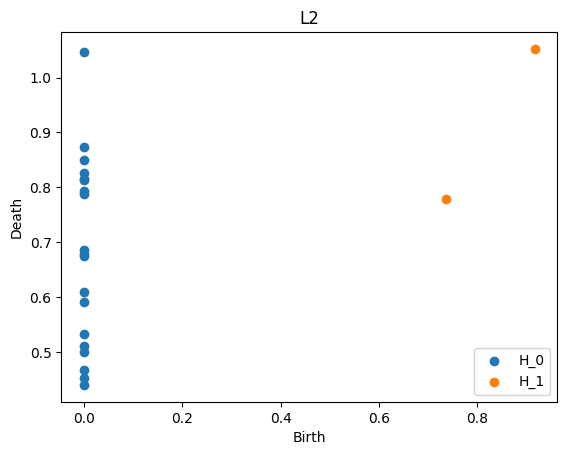

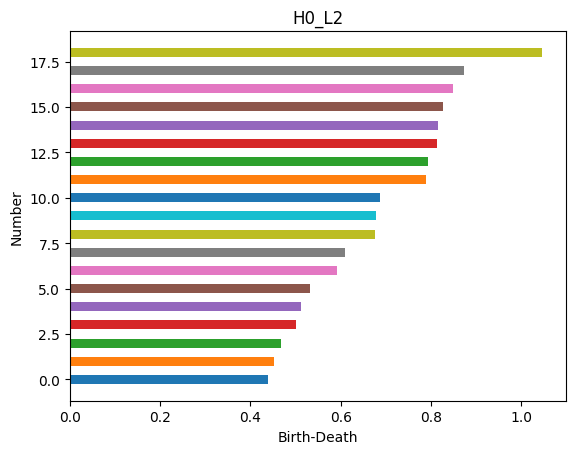

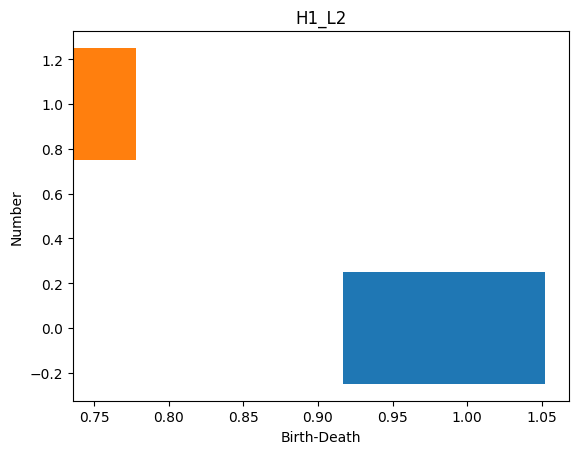

{'LeNet-birth-death-l1_distance': [array([[0.        , 1.11417484],
       [0.        , 1.15617383],
       [0.        , 1.15873635],
       [0.        , 1.17782903],
       [0.        , 1.2043469 ],
       [0.        , 1.31834698],
       [0.        , 1.4143734 ],
       [0.        , 1.49578369],
       [0.        , 1.63277268],
       [0.        , 1.66481471],
       [0.        , 1.84072673],
       [0.        , 2.07878542],
       [0.        , 2.09943151],
       [0.        , 2.14623785],
       [0.        , 2.16958523],
       [0.        , 2.20829105],
       [0.        , 2.22084856],
       [0.        , 2.25635934],
       [0.        , 2.79053974],
       [0.        ,        inf]]), array([[2.83881545, 2.84297037],
       [2.27585888, 2.28646421],
       [2.24689484, 2.39978385],
       [1.76358926, 2.0949769 ]])], 'LeNet-birth-death-l2_distance': [array([[0.        , 0.43976733],
       [0.        , 0.45294929],
       [0.        , 0.46758857],
       [0.        , 0.50039506],
  

In [4]:
k = betti_4_net(model=LeNet(), save_root="./distance/LeNet-NT/",debug_size=10,seed=15,name=LeNet.__name__,transform=data_transform["train"])
print(k)